In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.feature_selection import RFE

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
import pandas as pd
import numpy as np

# Load the dataset
data = pd.read_csv('finalDatasetWithRain.csv')  # Replace with your dataset path



In [5]:
# Display the first few rows of the dataset
print(data.head())

    lat   lon        time   omega_x   omega_y     omega     pr_wtr  rhum_x  \
0  30.0  70.0  1948-01-01  0.043999 -0.005003 -0.050001   9.959991   22.25   
1  30.0  70.0  1948-01-02  0.094997  0.104998  0.006998   9.519989   19.50   
2  30.0  70.0  1948-01-03  0.038998  0.036999  0.013998  10.220001   25.50   
3  30.0  70.0  1948-01-04  0.264997  0.215998  0.077997   9.470001   11.25   
4  30.0  70.0  1948-01-05  0.100998  0.128998  0.016998  11.269989   39.75   

   rhum_y       rhum  ...  tmp_x      tmp_y        tmp     uwnd_x    uwnd_y  \
0   42.50  47.500015  ...  296.8  281.41998  296.07000  16.120010  4.600006   
1   32.75  51.250015  ...  296.8  282.12000  295.99000  18.000015  3.570007   
2   25.50  52.750015  ...  296.8  282.25000  295.91998  13.820007  3.570007   
3   15.75  50.500015  ...  296.8  282.20000  295.87000  14.750015  5.000015   
4   33.25  47.000015  ...  296.8  282.34998  295.80000  27.470001  9.320007   

       uwnd     vwnd_x    vwnd_y      vwnd    rain  
0 -

In [6]:
# Display basic statistics
print(data.describe())

                 lat            lon        omega_x        omega_y  \
count  622392.000000  622392.000000  310836.000000  310836.000000   
mean       26.577300      73.854167       0.027548       0.007679   
std         2.383093       3.543201       0.085892       0.090030   
min        23.809200      69.375000      -0.912003      -1.147001   
25%        24.702300      70.000000      -0.017002      -0.031002   
50%        26.250000      73.750000       0.026999       0.014997   
75%        28.125000      77.500000       0.074999       0.056997   
max        30.000000      78.750000       0.628998       0.594997   

               omega         pr_wtr         rhum_x         rhum_y  \
count  310836.000000  311196.000000  311196.000000  311196.000000   
mean       -0.018420      24.636192      23.414007      35.940565   
std         0.084602      14.467060      20.210833      22.976469   
min        -0.940002      -0.869995       0.000000       0.000000   
25%        -0.067001      13.1900

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 622392 entries, 0 to 622391
Data columns (total 21 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   lat      622392 non-null  float64
 1   lon      622392 non-null  float64
 2   time     622392 non-null  object 
 3   omega_x  310836 non-null  float64
 4   omega_y  310836 non-null  float64
 5   omega    310836 non-null  float64
 6   pr_wtr   311196 non-null  float64
 7   rhum_x   311196 non-null  float64
 8   rhum_y   311196 non-null  float64
 9   rhum     311196 non-null  float64
 10  slp      311196 non-null  float64
 11  tmp_x    622392 non-null  float64
 12  tmp_y    622392 non-null  float64
 13  tmp      622392 non-null  float64
 14  uwnd_x   311196 non-null  float64
 15  uwnd_y   311196 non-null  float64
 16  uwnd     311196 non-null  float64
 17  vwnd_x   311196 non-null  float64
 18  vwnd_y   311196 non-null  float64
 19  vwnd     311196 non-null  float64
 20  rain     388995 non-null  

In [8]:
data.shape

(622392, 21)

In [9]:
# Check for missing values
print(data.isnull().sum())

lat             0
lon             0
time            0
omega_x    311556
omega_y    311556
omega      311556
pr_wtr     311196
rhum_x     311196
rhum_y     311196
rhum       311196
slp        311196
tmp_x           0
tmp_y           0
tmp             0
uwnd_x     311196
uwnd_y     311196
uwnd       311196
vwnd_x     311196
vwnd_y     311196
vwnd       311196
rain       233397
dtype: int64


In [10]:
data = data[data['rain'] != -9999.0]

In [11]:
data.dropna(subset=['rain'], inplace=True)

In [12]:
print(data.isnull().sum())

lat            0
lon            0
time           0
omega_x    78069
omega_y    78069
omega      78069
pr_wtr     77799
rhum_x     77799
rhum_y     77799
rhum       77799
slp        77799
tmp_x          0
tmp_y          0
tmp            0
uwnd_x     77799
uwnd_y     77799
uwnd       77799
vwnd_x     77799
vwnd_y     77799
vwnd       77799
rain           0
dtype: int64


In [13]:
data.shape

(311196, 21)

In [14]:
data.dropna(inplace=True)

In [15]:
data.drop(columns=['time'], inplace=True)

In [16]:
print(data.isnull().sum())

lat        0
lon        0
omega_x    0
omega_y    0
omega      0
pr_wtr     0
rhum_x     0
rhum_y     0
rhum       0
slp        0
tmp_x      0
tmp_y      0
tmp        0
uwnd_x     0
uwnd_y     0
uwnd       0
vwnd_x     0
vwnd_y     0
vwnd       0
rain       0
dtype: int64


In [17]:
data.shape

(233127, 20)

In [18]:
from FeatureScore import FeatureScoreCalculator

In [19]:
target="rain"
calculator = FeatureScoreCalculator(data, target)

In [20]:
calculator.display_scores()

Feature 1: pr_wtr - Correlation Score = 100.00
Feature 2: rhum - Correlation Score = 99.67
Feature 3: uwnd_x - Correlation Score = 68.52
Feature 4: rhum_y - Correlation Score = 68.05
Feature 5: uwnd_y - Correlation Score = 65.70
Feature 6: rhum_x - Correlation Score = 62.78
Feature 7: slp - Correlation Score = 61.12
Feature 8: omega_x - Correlation Score = 49.54
Feature 9: omega - Correlation Score = 47.55
Feature 10: omega_y - Correlation Score = 40.70
Feature 11: tmp - Correlation Score = 37.01
Feature 12: tmp_y - Correlation Score = 26.60
Feature 13: lon - Correlation Score = 26.14
Feature 14: tmp_x - Correlation Score = 24.94
Feature 15: vwnd_x - Correlation Score = 19.86
Feature 16: uwnd - Correlation Score = 14.38
Feature 17: vwnd_y - Correlation Score = 9.28
Feature 18: vwnd - Correlation Score = 4.69
Feature 19: lat - Correlation Score = 3.27


In [21]:
data['rain'].describe()

count    233127.000000
mean          1.580117
std           7.797053
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max         325.980408
Name: rain, dtype: float64

In [22]:
threshold = 2

filtered_data = data[data['rain'] <= threshold]

filtered_summary = filtered_data['rain'].describe()
print(filtered_summary)

count    211127.000000
mean          0.043873
std           0.222434
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           2.000000
Name: rain, dtype: float64


In [23]:
X = filtered_data[['lat', 'lon', 'omega_x', 'omega_y', 'omega', 'pr_wtr', 'rhum_x', 'rhum_y', 'rhum', 
                   'slp', 'tmp_x', 'tmp_y', 'tmp', 'uwnd_x', 'uwnd_y', 'uwnd', 'vwnd_x', 'vwnd_y', 'vwnd']]
y = filtered_data['rain']

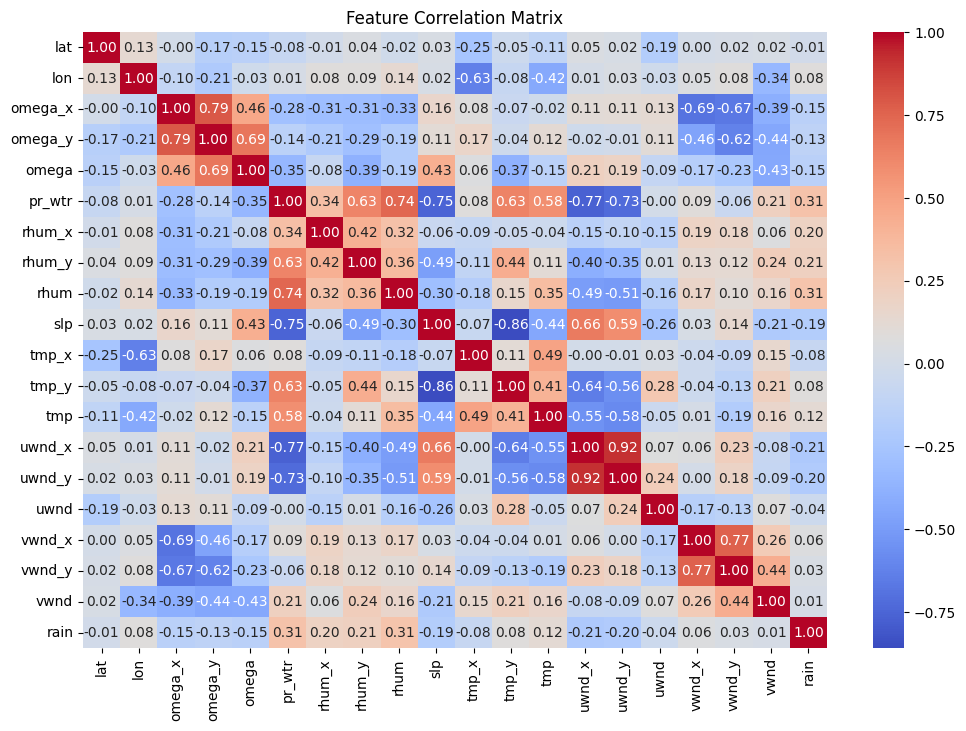

In [24]:
# Correlation analysis
correlation_matrix = data.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Feature Correlation Matrix')
plt.show()


In [25]:
# Split the dataset into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the shapes of the training and testing sets
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (168901, 19)
Shape of X_test: (42226, 19)
Shape of y_train: (168901,)
Shape of y_test: (42226,)


In [26]:
X_train.shape

(168901, 19)

In [27]:
y_train.shape

(168901,)

In [28]:
rmodel = RandomForestRegressor()

rmodel.fit(X_train, y_train)

# Predicting on the test set
y_pred = rmodel.predict(X_test)

# Evaluating the model
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"MSE: {mse}")
print(f"MAE: {mae}")
print(f"R-squared: {r2}")

MSE: 0.04513855317661543
MAE: 0.07751563380648603
R-squared: 0.07754007828900655


In [29]:
# Plotting Predicted vs. Actual Values
y_pred = rmodel.predict(X_test)
import pandas as pd
results = pd.DataFrame({
    'Actual': y_test,
    'Predicted': y_pred.flatten()
})

print(results.head(10))

        Actual  Predicted
159474     0.0   0.012108
80795      0.0   0.034169
180008     0.0   0.002016
199511     0.0   0.108996
126123     0.0   0.052410
243177     0.0   0.025527
119251     0.0   0.000000
180199     0.0   0.000000
263883     0.0   0.000000
110414     0.0   0.096356


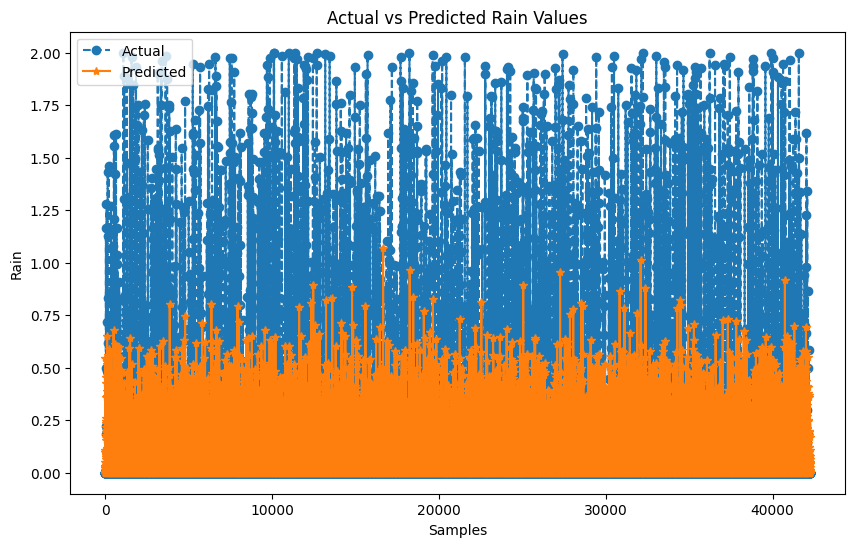

In [30]:
# Plotting the Actual vs Predicted values
plt.figure(figsize=(10, 6))
plt.plot(y_test.values, label='Actual', linestyle='--', marker='o')
plt.plot(y_pred, label='Predicted', linestyle='-', marker='*')
plt.title('Actual vs Predicted Rain Values')
plt.xlabel('Samples')
plt.ylabel('Rain')
plt.legend()
plt.show()

In [32]:
import xgboost as xgb

# Initialize the model
model_xgb = xgb.XGBRegressor(objective ='reg:squarederror', n_estimators=100, random_state=42)

# Fit the model
model_xgb.fit(X_train, y_train)
y_pred =model_xgb.predict(X_test)

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"MSE: {mse}")
print(f"MAE: {mae}")
print(f"R-squared: {r2}")

MSE: 0.04535253733286039
MAE: 0.0731924631872113
R-squared: 0.07316705801862311


In [33]:
y_pred = model_xgb.predict(X_test)
import pandas as pd
results = pd.DataFrame({
    'Actual': y_test,
    'Predicted': y_pred.flatten()
})

print(results.head(10))

        Actual  Predicted
159474     0.0   0.003632
80795      0.0   0.005764
180008     0.0   0.051934
199511     0.0   0.041869
126123     0.0   0.045596
243177     0.0   0.025216
119251     0.0  -0.002086
180199     0.0   0.006326
263883     0.0   0.004502
110414     0.0   0.056999


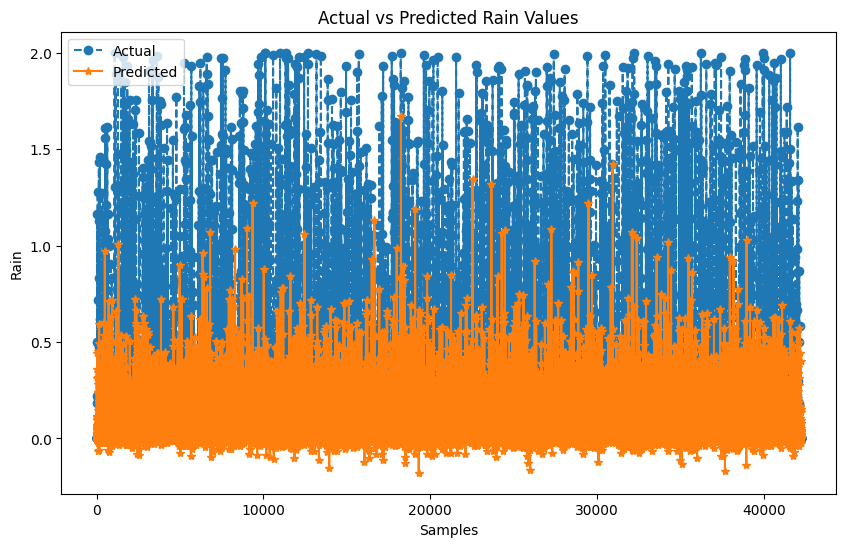

In [34]:
plt.figure(figsize=(10, 6))
plt.plot(y_test.values, label='Actual', linestyle='--', marker='o')
plt.plot(y_pred, label='Predicted', linestyle='-', marker='*')
plt.title('Actual vs Predicted Rain Values')
plt.xlabel('Samples')
plt.ylabel('Rain')
plt.legend()
plt.show()

In [35]:
import joblib

joblib.dump(rmodel, 'random_forest_model.pkl')


['random_forest_model.pkl']